In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 3.01.+Country+clusters.csv to 3.01.+Country+clusters.csv


In [ ]:
for i in uploaded:
  df = pd.read_csv(i)

In [ ]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


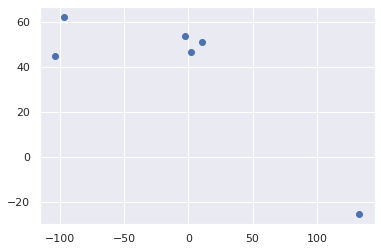

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

In [ ]:
x = df.iloc[:,1:3]

In [ ]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [ ]:
kmeans = KMeans(3)

In [ ]:
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering resultss

In [ ]:
identified_clusters = kmeans.fit_predict(x)

In [ ]:
identified_clusters

array([0, 0, 2, 2, 2, 1], dtype=int32)

In [ ]:
data_with_cluster = df.copy()
data_with_cluster['cluster']= identified_clusters

In [ ]:
data_with_cluster.head(5)

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2


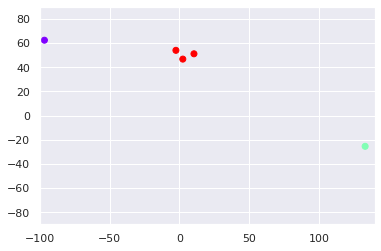

In [ ]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c =data_with_cluster['cluster'], cmap='rainbow')
plt.xlim(-100, 140)
plt.ylim(-90, 90)
plt.show()

## By category

In [ ]:
data_category = df.copy()

In [ ]:
data_category['mapping'] = data_category['Language'].map({'English':0, 'French': 1,'German':2})

In [ ]:
data_category

,Country,Latitude,Longitude,Language,mapping
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


In [ ]:
x = data_category.iloc[:,4:5]

In [ ]:
x

,mapping
0,0
1,0
2,1
3,0
4,2
5,0


## Clustering

In [ ]:
kmeans = KMeans(3)

In [ ]:
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering resultss

In [ ]:
identified_clusters = kmeans.fit_predict(x)

In [ ]:
identified_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [ ]:
data_category = df.copy()
data_category['cluster']= identified_clusters

In [ ]:
data_category.head(5)

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1


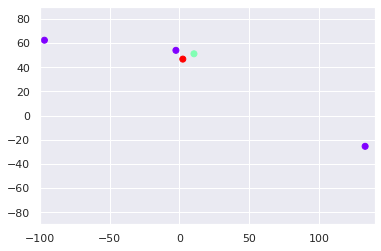

In [ ]:
plt.scatter(data_category['Longitude'], data_category['Latitude'], c =data_category['cluster'], cmap='rainbow')
plt.xlim(-100, 140)
plt.ylim(-90, 90)
plt.show()

# Selecting number of clusters

In [ ]:
kmeans.inertia_

0.0

In [ ]:
wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

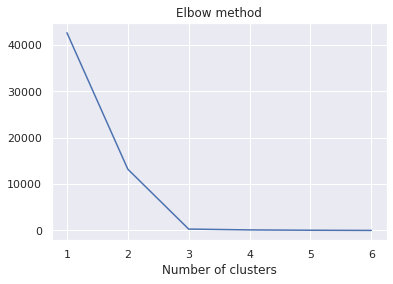

In [ ]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.show()

Standardize

In [ ]:
from skelearn import preprocessing


In [ ]:
x_scaled= preprocessing.scale(x)

In [ ]:
wscc = []

for i in (1,10):
  kmeans = KMeans(i)
  kmeans.fix(x_scaled)
  wscc_iter = kmenas.inertia_
  wscc.append(wscc_iter)